## Import Modules

In [6]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')

## Load the Dataset

In [43]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [51]:
paths = []
labels = []
for dirname, _, filenames in os.walk('/content/drive/MyDrive/TESS_SR'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label = filename.split('_')[-1]
        label = label.split('.')[0]
        labels.append(label.lower())
    if len(paths) == 2800:
        break
print('Dataset is Loaded')

Dataset is Loaded


In [52]:
len(paths)

2800

In [18]:
paths[:5]

['/content/drive/MyDrive/TESS/OAF_angry/OAF_chat_angry.wav',
 '/content/drive/MyDrive/TESS/OAF_angry/OAF_calm_angry.wav',
 '/content/drive/MyDrive/TESS/OAF_angry/OAF_beg_angry.wav',
 '/content/drive/MyDrive/TESS/OAF_angry/OAF_came_angry.wav',
 '/content/drive/MyDrive/TESS/OAF_angry/OAF_bone_angry.wav']

In [56]:
## Create a dataframe
df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels
df.head()

,speech,label
0,/content/drive/MyDrive/TESS_SR/OAF_Sad/OAF_che...,sad
1,/content/drive/MyDrive/TESS_SR/OAF_Sad/OAF_cha...,sad
2,/content/drive/MyDrive/TESS_SR/OAF_Sad/OAF_dea...,sad
3,/content/drive/MyDrive/TESS_SR/OAF_Sad/OAF_dat...,sad
4,/content/drive/MyDrive/TESS_SR/OAF_Sad/OAF_chi...,sad


In [57]:
df['label'].value_counts()

,count
label,
sad,400
neutral,400
disgust,400
fear,400
happy,400
ps,400
angry,400


## Exploratory Data Analysis

<Axes: xlabel='label', ylabel='count'>

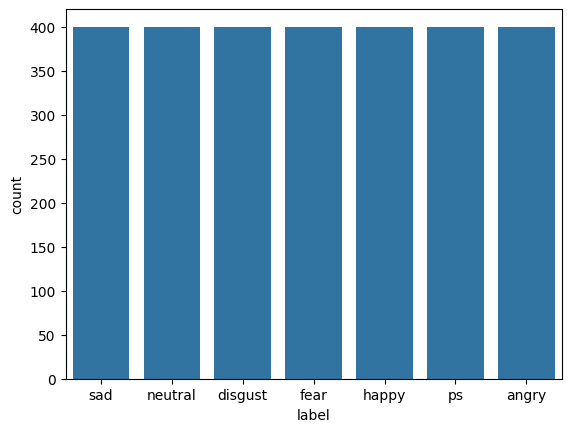

In [58]:
sns.countplot(data=df, x='label')

In [59]:
def waveplot(data, sr, emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion, size=20)
    librosa.display.waveshow(data, sr=sr)
    plt.show()

def spectogram(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11,4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

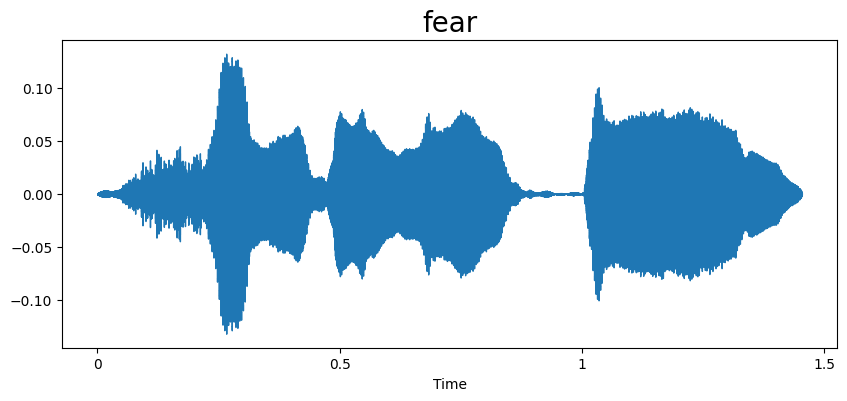

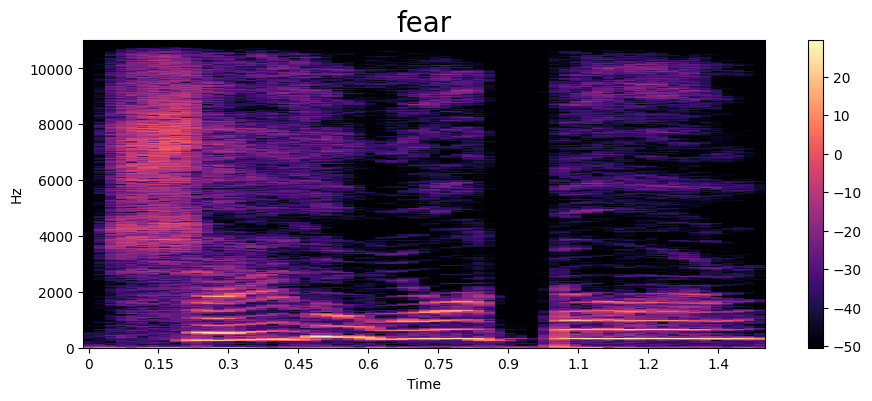

In [60]:
emotion = 'fear'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

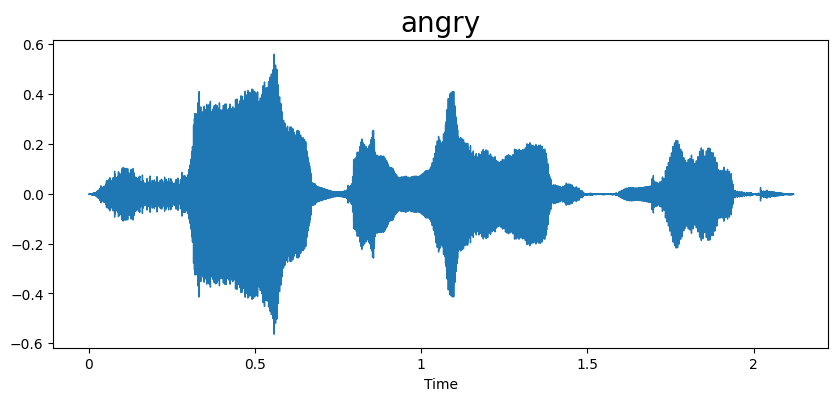

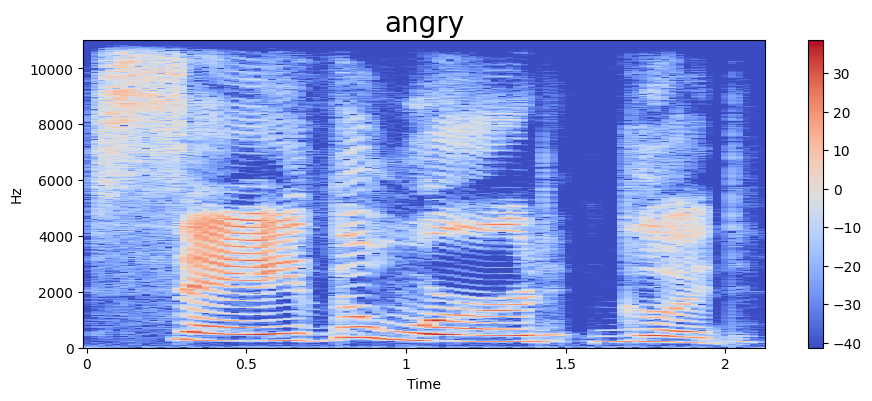

In [61]:
emotion = 'angry'
path = np.array(df['speech'][df['label']==emotion])[1]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

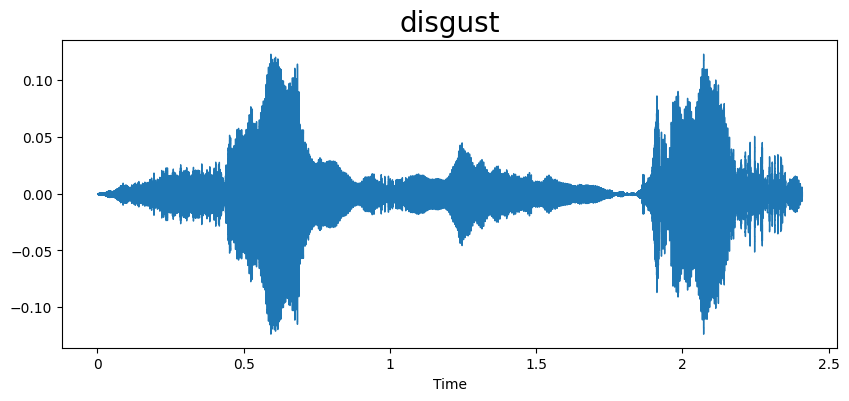

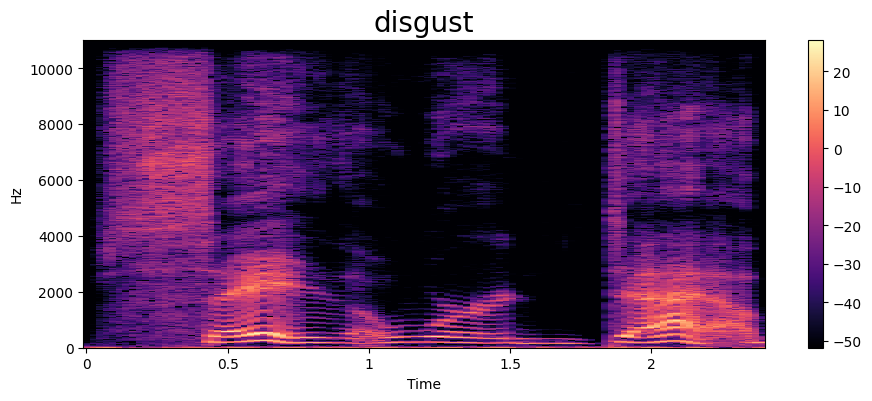

In [62]:
emotion = 'disgust'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

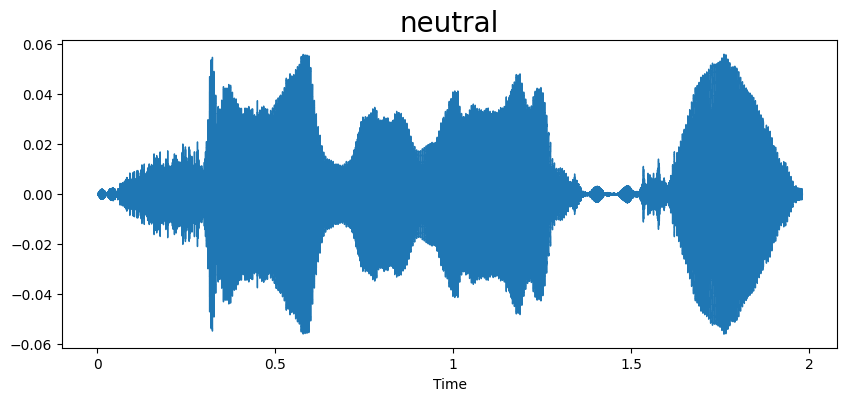

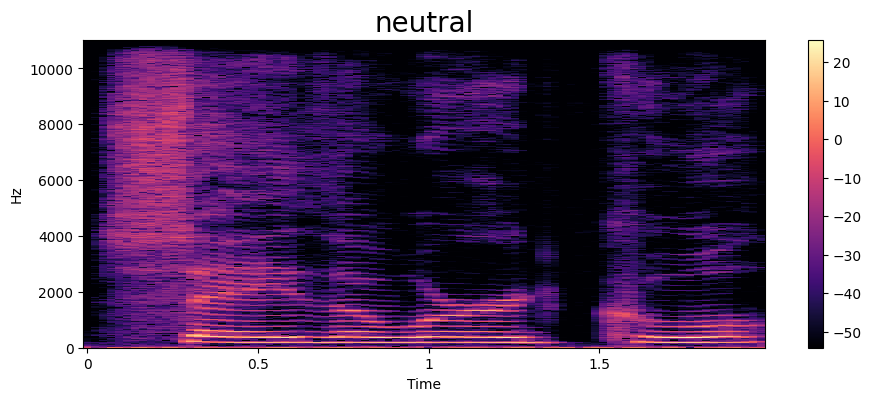

In [63]:
emotion = 'neutral'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

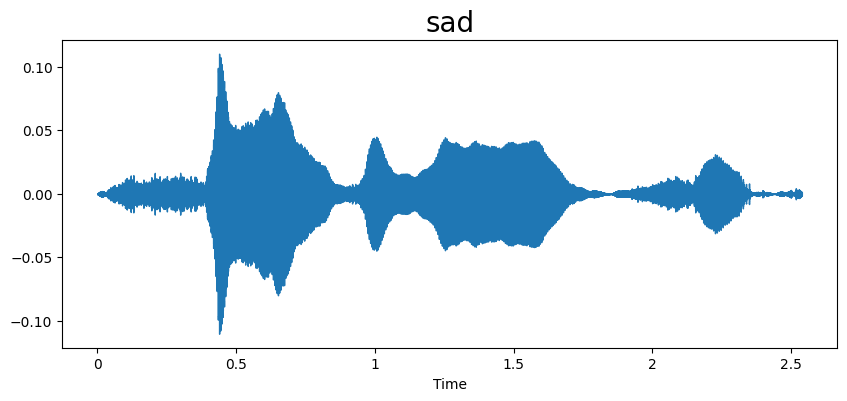

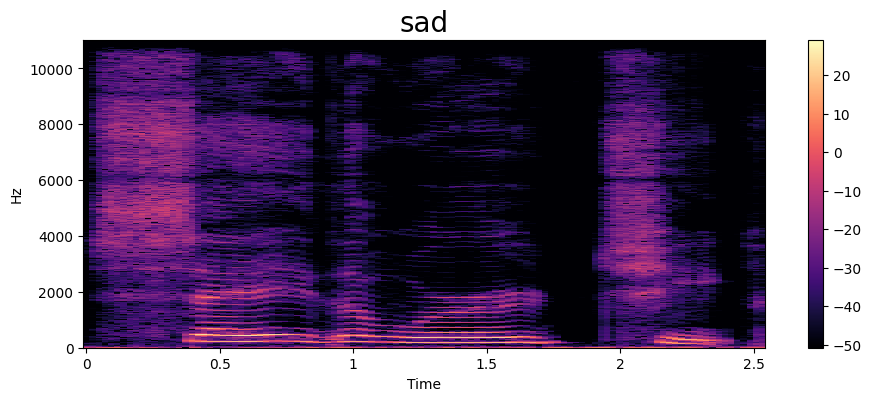

In [64]:
emotion = 'sad'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

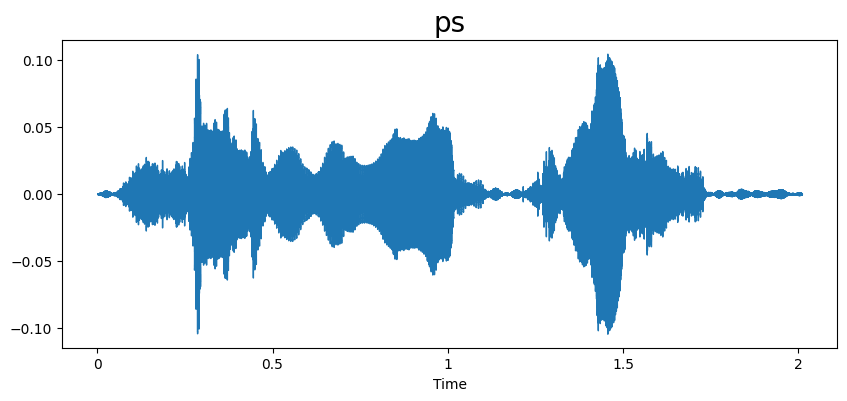

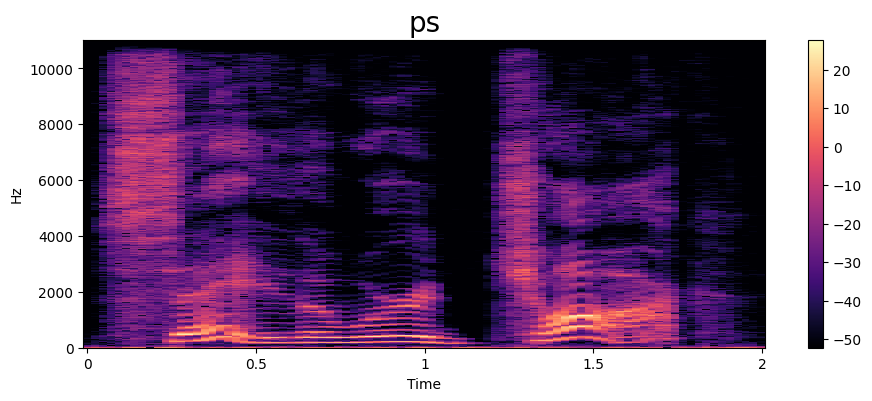

In [65]:
emotion = 'ps'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

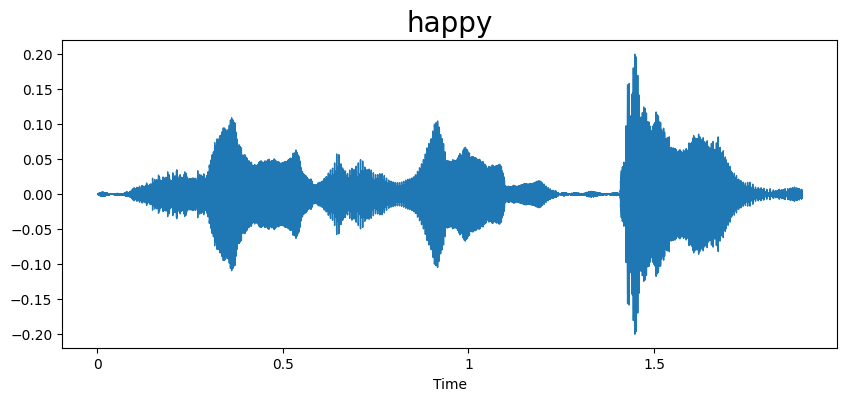

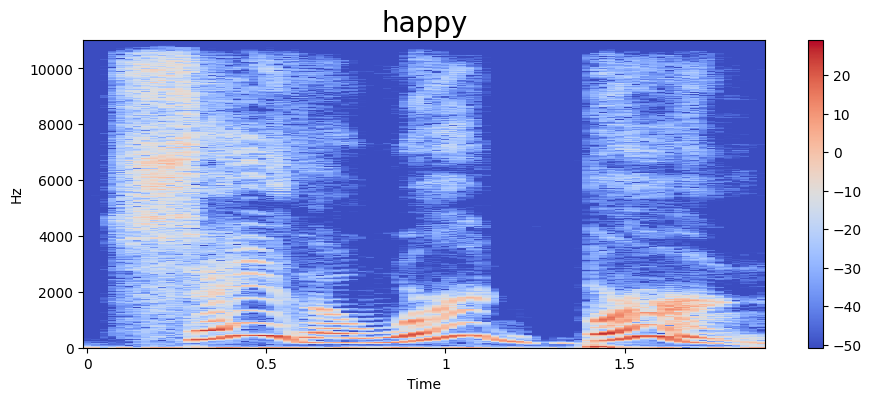

In [66]:
emotion = 'happy'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

## Feature Extraction

In [67]:
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc

In [68]:
extract_mfcc(df['speech'][0])

array([-5.3880530e+02,  7.6377266e+01,  2.1082216e+01,  2.8516218e+01,
        2.6717161e+01,  1.1764237e+01, -1.0363333e+01, -1.4171065e+01,
       -1.5541773e+01,  2.9608595e-01, -1.3998397e+01, -3.2783461e+00,
       -1.1542360e+00,  1.0037632e+00, -2.0549247e+00, -5.1542993e+00,
        1.5246558e+00,  2.3353767e+00, -1.8704921e-01, -7.7956777e+00,
        6.3801436e+00, -1.9323509e+00, -3.6260977e+00, -1.0457346e+00,
       -6.7553601e+00,  2.1213486e+00, -4.0035748e+00,  2.7184251e-01,
        2.6500020e+00,  8.7515678e+00,  6.9419889e+00,  9.0253448e+00,
        5.1197553e+00,  6.5529904e+00,  5.6394587e+00,  1.0139584e+01,
        1.4813517e+01,  1.7826204e+01,  1.2655059e+01,  1.0907801e+01],
      dtype=float32)

In [69]:
X_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))

In [70]:
X_mfcc

,speech
0,"[-538.8053, 76.377266, 21.082216, 28.516218, 2..."
1,"[-505.0487, 91.5792, 16.55689, 13.743943, 19.5..."
2,"[-535.6866, 93.98498, 33.60307, 13.085667, 25...."
3,"[-567.1759, 99.33025, 29.057568, 23.46174, 30...."
4,"[-541.4565, 62.0042, 23.376999, 25.315228, 27...."
...,...
2795,"[-440.1182, 97.713135, 9.905804, -19.291803, -..."
2796,"[-413.2932, 81.26914, -5.3418655, -12.67008, -..."
2797,"[-429.61728, 72.033585, -6.568757, -12.464929,..."
2798,"[-418.5793, 73.231026, 9.666024, -16.868618, -..."


In [71]:
X = [x for x in X_mfcc]
X = np.array(X)
X.shape

(2800, 40)

In [72]:
## input split
X = np.expand_dims(X, -1)
X.shape

(2800, 40, 1)

In [73]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(df[['label']])

In [74]:
y = y.toarray()

In [75]:
y.shape

(2800, 7)

## Create the LSTM Model

In [92]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

model = Sequential([
    LSTM(140, return_sequences=False, input_shape=(40,1)),
    Dropout(0.2),
    Dense(70, activation='relu'),
    Dropout(0.2),
    Dense(70, activation='relu'),
    Dropout(0.2),
    Dense(70, activation='relu'),
    Dropout(0.2),
    Dense(7, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 140)            │        79,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 140)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 70)             │         9,870 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 70)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 70)             │         4,970 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 70)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 70)             │         4,970 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 70)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 7)              │           497 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 99,827 (389.95 KB)

 Trainable params: 99,827 (389.95 KB)

 Non-trainable params: 0 (0.00 B)

In [93]:
# Train the model
history = model.fit(X, y, validation_split=0.2, epochs=50, batch_size=64)

Epoch 1/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 12s 94ms/step - accuracy: 0.2910 - loss: 1.7481 - val_accuracy: 0.0000e+00 - val_loss: 3.6921
Epoch 2/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 79ms/step - accuracy: 0.7049 - loss: 0.8128 - val_accuracy: 0.0054 - val_loss: 3.2805
Epoch 3/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 72ms/step - accuracy: 0.8385 - loss: 0.4321 - val_accuracy: 0.0036 - val_loss: 3.4034
Epoch 4/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - accuracy: 0.8810 - loss: 0.3619 - val_accuracy: 0.0071 - val_loss: 3.3019
Epoch 5/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 72ms/step - accuracy: 0.9185 - loss: 0.2587 - val_accuracy: 0.1196 - val_loss: 2.2652
Epoch 6/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 137ms/step - accuracy: 0.9409 - loss: 0.2092 - val_accuracy: 0.0946 - val_loss: 2.8677
Epoch 7/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 71ms/step - accuracy: 0.9538 - loss: 0.1579 - val_accuracy: 0.1911 - val_loss: 3.2017
Epoch 8/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 73ms/step - accuracy: 0.9503 - loss: 0.1547 - val_accuracy: 0.35

In [ ]:
# best val accuracy:
# use checkpoint to save the best val accuracy model
# adjust learning rate for slow convergence

## Plot the results

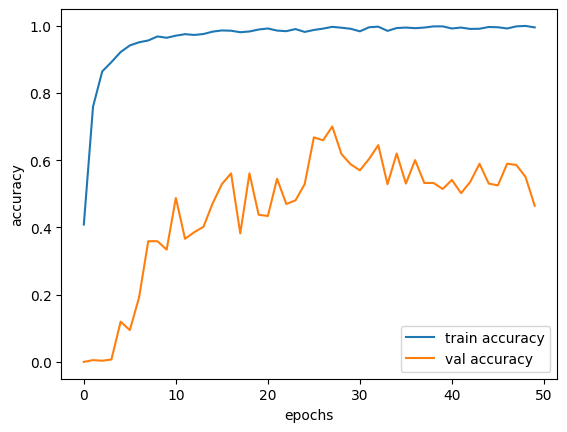

In [94]:
epochs = list(range(50))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

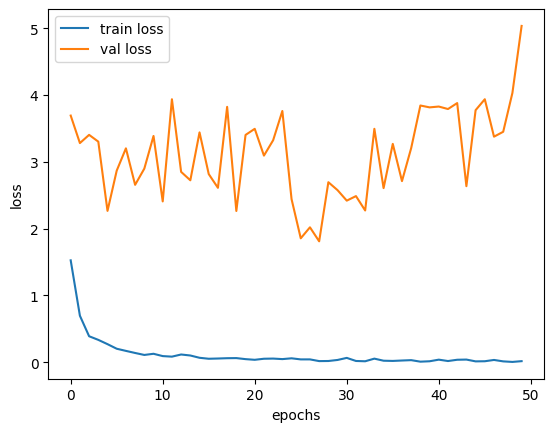

In [95]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()